Perceptron choosing random points to classify

In [332]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [333]:
x, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, hypercube=False, n_classes=2, random_state=41, class_sep=10)


In [334]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [335]:
# add a column of ones to x to account for the bias term in the linear model
x = np.insert(x, 0, 1, axis=1)
print(x.shape)

(100, 3)


In [336]:
x

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

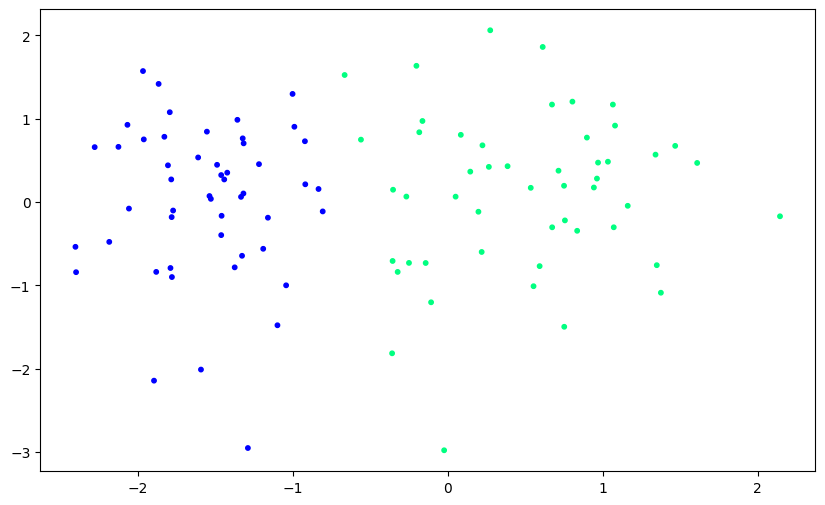

In [337]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 1], x[:, 2], c=y, cmap='winter', s=10)
plt.show()

In [338]:
def perceptron(x, y, epochs=1000, learning_rate=0.1):
    w = np.ones(x.shape[1])
    for i in range(epochs):
        j = np.random.randint(x.shape[0])
        y_hat = step(np.dot(w, x[j]))
        w += learning_rate * (y[j] - y_hat) * x[j]
    return w[0], w[1:]

In [339]:
# np.ones(3)
# np.random.randint(x.shape[0])
# step(-0.5)

In [340]:
def step(z):
    return 1 if z >= 0 else 0

In [341]:
intercept, coef = perceptron(x, y)

In [342]:
print(intercept)
print(coef)

1.0
[1.39478894 0.0321595 ]


In [343]:
# ax+by+c=0 to y=mx+b here, m=-a/b, b=-c/b ||| a = coef[0], b = coef[1], c = intercept
m = -coef[0] / coef[1]
b = -intercept / coef[1]

In [344]:
x1 = np.linspace(-3, 3, 100)
y1 = m * x1 + b

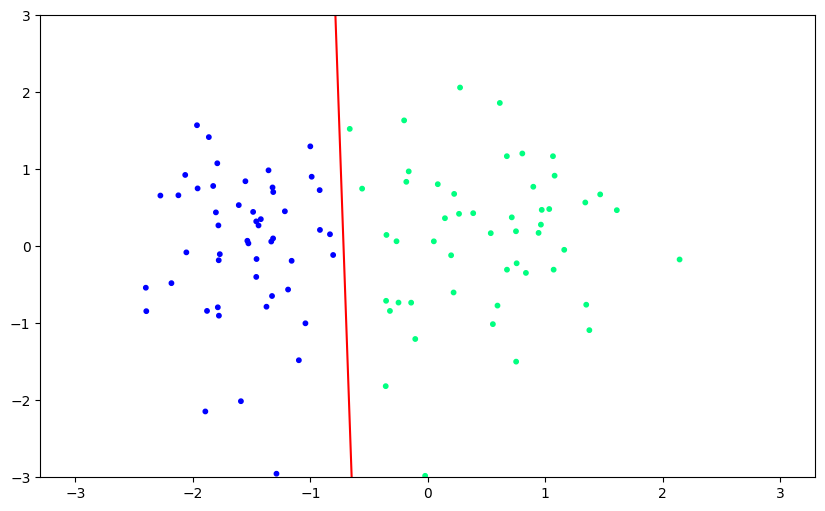

In [345]:
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, c='red')
plt.scatter(x[:, 1], x[:, 2], c=y, cmap='winter', s=10)
plt.ylim(-3, 3)
plt.show()